# Predicting Individual's Salary

**To be completed INDIVIDUALLY and due on March 31 at 3 pm.**

In this assignment, we will work on [US census data](http://www.google.com/url?q=http%3A%2F%2Fpoloclub.gatech.edu%2Fcse6242%2F2014fall%2Fhw4%2Fhw4-task1-data.tsv&sa=D&sntz=1&usg=AFQjCNGp2K-9_NTjdjqwi627u3kPcszXqw). The goal is to determine whether a person makes over $50K. The dataset was extracted from the 1994 US census data. You can find the details of the dataset [here](http://www.google.com/url?q=http%3A%2F%2Fpoloclub.gatech.edu%2Fcse6242%2F2014fall%2Fhw4%2Fhw4-task1-attributes.txt&sa=D&sntz=1&usg=AFQjCNEBbQwdw2e0dPqWhuQkomlP9hnDtw). The data is stored in a tab separated value file,  and each line represents a person.

This dataset contains categorical values. Most of the algorithms we learn in class can only handle numeric values and so we need to create a new variable (dummy variable) for every unique value of the categorical variables. To convert the categorical variable into dummy/indicator variables, we will use pandas.get_dummies. Here is an example on how to convert categorical variables to dummy variables:

In [1]:
import pandas as pd
raw_data = {'age': [23, 62, 31, 48, 59],
        'salary': [60000, 100000, 120000, 150000, 95000],
        'education': ['Bachelor', 'Masters', 'PhD', 'Jd', 'Masters']}
df = pd.DataFrame(raw_data, columns = ['age', 'salary', 'education'])
df_edu = pd.get_dummies(df['education'], prefix = 'edu')
df_new = pd.concat([df, df_edu], axis=1)
df_new = df_new.drop( ['education'], axis = 1 )
df_new

,age,salary,edu_Bachelor,edu_Jd,edu_Masters,edu_PhD
0,23,60000,1,0,0,0
1,62,100000,0,0,1,0
2,31,120000,0,0,0,1
3,48,150000,0,1,0,0
4,59,95000,0,0,1,0


Now your job is to convert all categorical features in the dataset to indicator variables.

**(10 pts)**

In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from scipy.stats import pointbiserialr, spearmanr
#from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn import metrics
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold, cross_val_score

#The input file was in .tsv format. I exported the file to excel and saved it in csv format.

%matplotlib inline

data = pd.read_csv("hw4-task1-data.csv")
data


,age,workclass,fnlwgt,education,educational-num,marital -status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [60]:
#Checking the percentage of missing values in the input data

column_names = data.columns
num_data = data.shape[0]
for c in column_names:
    num_chk = data[c].isin(["?"]).sum()
    if num_chk > 0:
        print (c)
        print (num_chk)
        print ("{0:.2f}%".format(float(num_chk) / num_data * 100))
        print ("\n")

workclass
2655
5.71%


occupation
2665
5.73%


native-country
823
1.77%




In [76]:
#data = pd.get_dummies(data)

#print(data.shape)

# remove rows where values are unknown
data = data[data.workclass != '?']
raw_data = data[data.workclass != '?']
data = data[data.occupation != '?']
raw_data = data[data.occupation != '?']
#data = data[data.native-country != '?']
#raw_data = data[data.native-country != '?']

In [64]:
# create numerical columns representing the categorical data
data['workclass_num'] = data.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
data['over50K'] = np.where(data.income == '<=50K', 0, 1)
#data['marital_num'] = data['marital-status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
data['race_num'] = data.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
data['sex_num'] = np.where(data.gender == 'Female', 0, 1)
data['rel_num'] = data.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
data.head()

C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,age,workclass,fnlwgt,education,educational-num,marital -status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_num,over50K,race_num,sex_num,rel_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,3,0,0,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,0,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,1,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,1


In [72]:
# create the numerical dummy columns for the features
dummies = pd.get_dummies(raw_data)

# del either the greater than 50K feature or less than 50K feature
del dummies['income_<=50K']
dummy_data = dummies.values

# shape the features and response 
X = dummy_data[:, :-1]
y = dummy_data[:, -1]
print(X.shape, y.shape)

(43845, 105) (43845,)


In [73]:
# create a feature numerically representative of different capital gains catergories 
def cap_split(row):
    if row['capital-gain'] > 0 and row['over50K'] == 1:
        return 1
    elif row['capital-gain'] > 0 and row['over50K'] == 0:
        return 2
    elif row['capital-gain'] <= 0 and row['over50K'] == 1:
        return 3
    else:
        return 4

Now that we know how to convert categorical variables to numerical dummy variables, we can use the algorithms we learned in the class. For the first part, we will use KNeighborsClassifier.

KNeighborsClassifier is an instant-based classification which simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point.

Report the accuracy of your prediction.

**(20 pts)**

In [68]:
from sklearn.neighbors import KNeighborsClassifier
X = data[['workclass_num', 'educational-num', 'race_num', 'sex_num', 'rel_num', 'capital-gain', 'capital-loss']]
y = data.over50K
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(max(scores))

0.853676336435


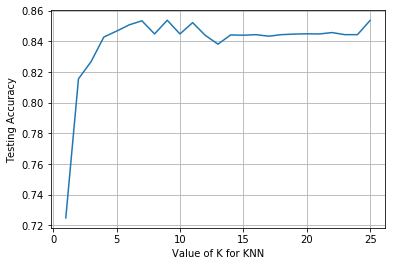

In [69]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

For this part of the homework, we will use [Decision Trees](http://scikit-learn.org/stable/modules/tree.html) to determine a person makes over $50K. Report accuracy score using decision trees. 

Compare your results with the results you obtained in Part 1.

**(20 pts)**


In [74]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
data.head()


,age,workclass,fnlwgt,education,educational-num,marital -status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_num,over50K,race_num,sex_num,rel_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,3,0,0,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,0,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,1,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,1


----------

In [71]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8533114395183361

When we applied K- nearest Neighbours algorithm, the accuracy was found to be 85.3676336435% whereas,
the accuracy when we applied Decision tree algorithm was found to be 85.33114395183361%. So, we can see that the accuracy was a little better when we applied the k-nearest neighbours algorithm.
